In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, confusion_matrix

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("Customers_in_a_shop.csv", header=None, names=["Date", "Customers"])
df

,Date,Customers
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0
3,1949-04,67.0
4,1949-05,123.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,720.0
142,1960-11,750.0


In [3]:
df["Year"], df["Month"] = df["Date"].apply(lambda x: x.split("-")[0]), df["Date"].apply(lambda x: x.split("-")[1])
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df

,Customers,Year,Month
Date,,,
1949-01-01,114.0,1949,01
1949-02-01,120.0,1949,02
1949-03-01,134.0,1949,03
1949-04-01,67.0,1949,04
1949-05-01,123.0,1949,05
...,...,...,...
1960-08-01,606.0,1960,08
1960-09-01,508.0,1960,09
1960-10-01,720.0,1960,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Customers  140 non-null    float64
 1   Year       144 non-null    object 
 2   Month      144 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.5+ KB


In [5]:
df["Customers"].interpolate("cubic", inplace=True)

In [6]:
df[df["Customers"].isnull()]

,Customers,Year,Month
Date,,,


<AxesSubplot:xlabel='Date', ylabel='Customers'>

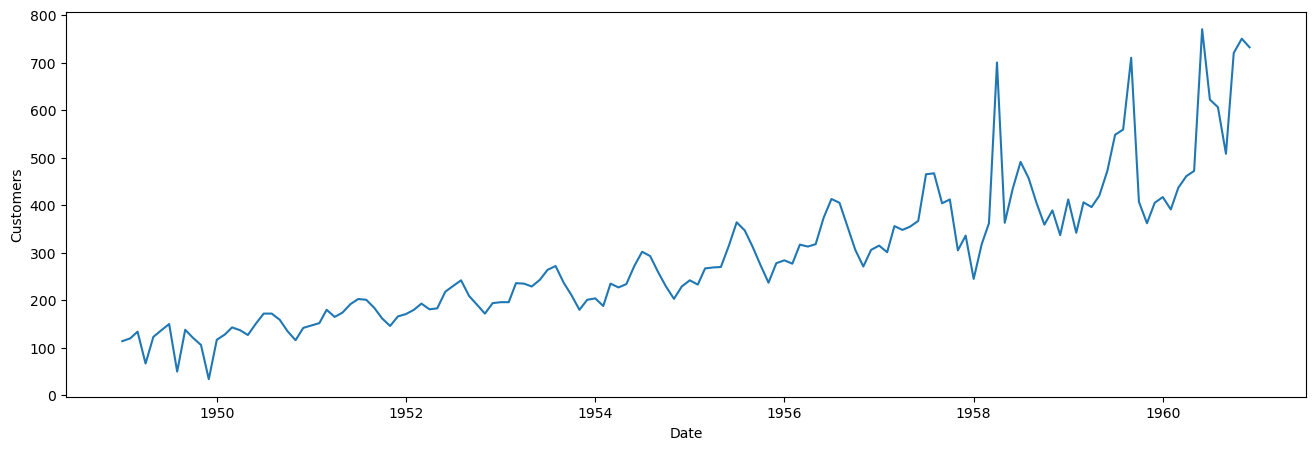

In [7]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(data=df, x="Date", y="Customers", ax=ax)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customers'>

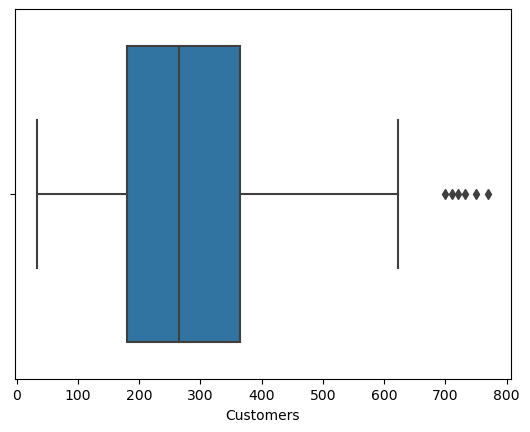

In [8]:
sns.boxplot(df["Customers"])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Customers'>

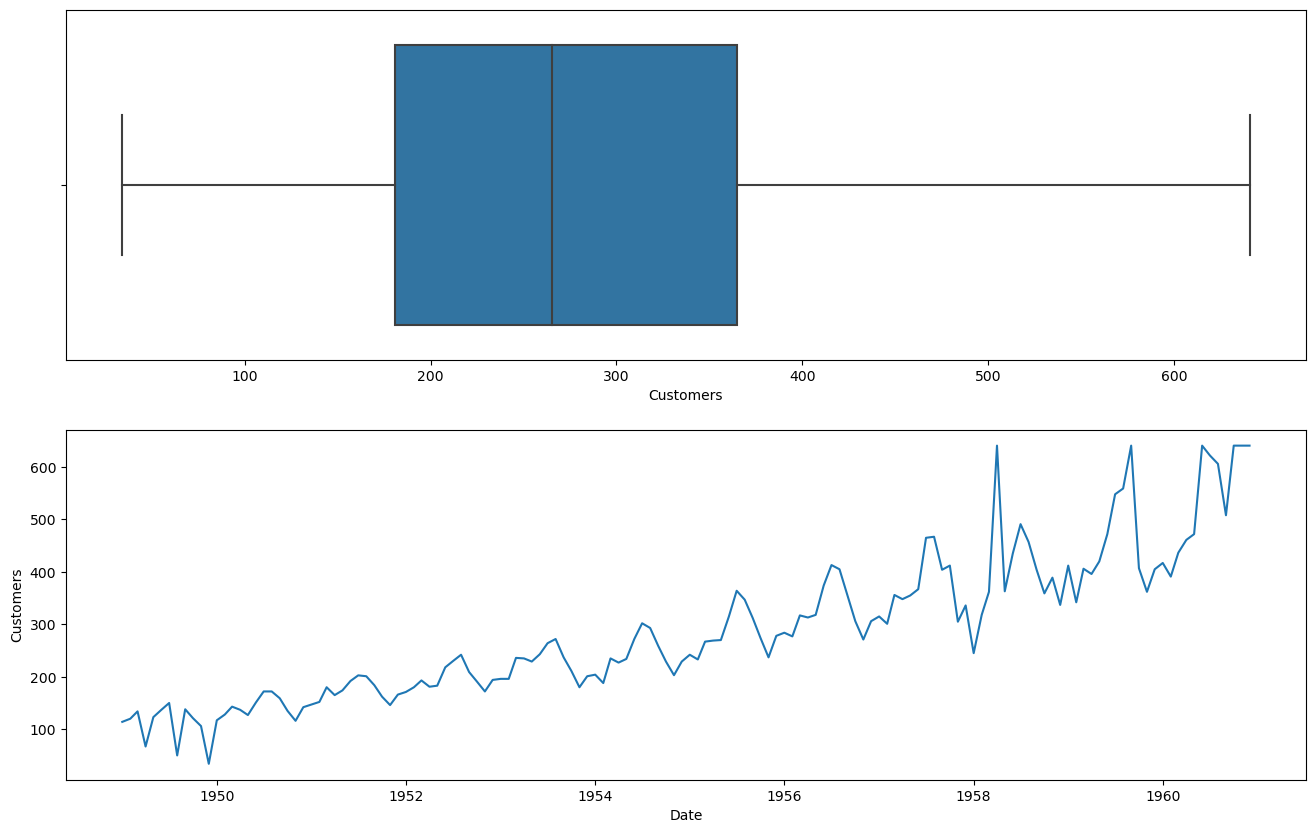

In [9]:
upper = df["Customers"].quantile([.75, .25]).values
upper = (upper[0]-upper[1])*1.5 + upper[0]

df.loc[df["Customers"] > upper, "Customers"] = upper

fig, ax = plt.subplots(nrows=2, figsize=(16, 10))
sns.boxplot(df["Customers"], ax=ax[0])
sns.lineplot(data=df, x="Date", y="Customers", ax=ax[1])

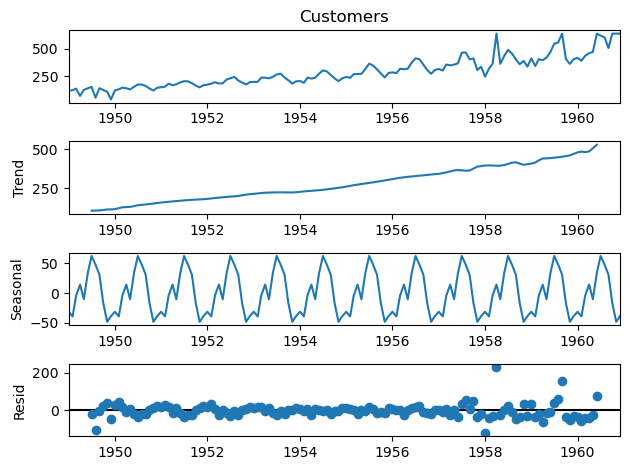

In [10]:
decompose = sm.tsa.seasonal_decompose(x=df["Customers"], model="additive")
decompose.plot()
plt.show()

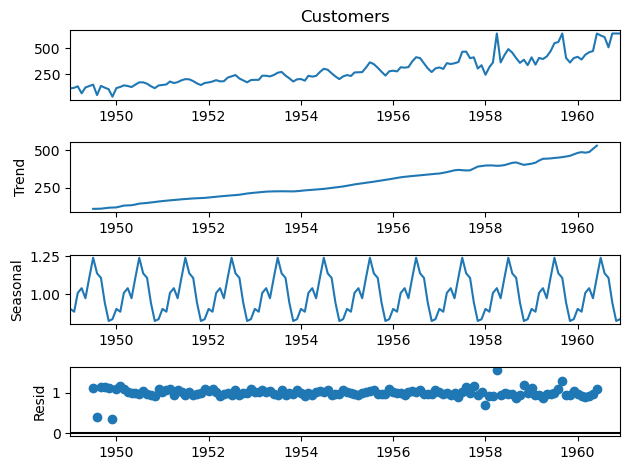

In [11]:
decompose = sm.tsa.seasonal_decompose(x=df["Customers"], model="multiplicative")
decompose.plot()
plt.show()

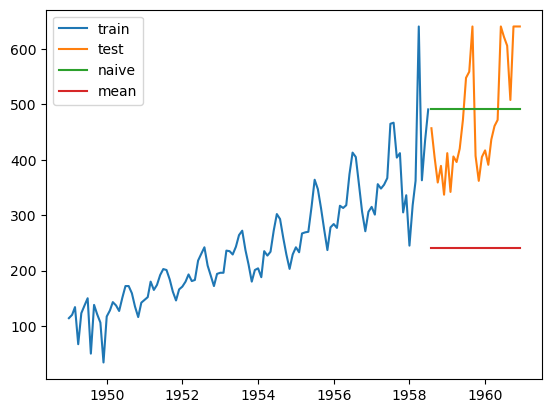

In [12]:
train, test = train_test_split(df, train_size=0.80, shuffle=False)

naive_test = test.copy()
forecast_test = test.copy()

naive_test["Customers"] = train["Customers"][-1]
forecast_test["Customers"] = train["Customers"].mean()

plt.plot(train["Customers"], label="train")
plt.plot(test["Customers"], label="test")
plt.plot(naive_test["Customers"], label="naive")
plt.plot(forecast_test["Customers"], label="mean")
plt.legend()
plt.show()

In [13]:
mean_absolute_percentage_error(test["Customers"], forecast_test["Customers"]), mean_absolute_percentage_error(test["Customers"], naive_test["Customers"])

(0.4721929893846961, 0.20444851687491325)

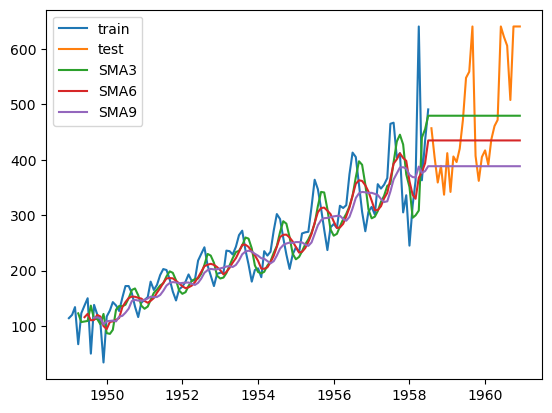

In [40]:
train, test = train_test_split(df, train_size=0.80, shuffle=False)

train_sma, test_sma = train.copy(), test.copy()
train_sma["Customers_SMA3"] = train_sma["Customers"].rolling(3, closed="left").mean()
train_sma["Customers_SMA6"] = train_sma["Customers"].rolling(6).mean()
train_sma["Customers_SMA9"] = train_sma["Customers"].rolling(9).mean()
test_sma["Customers_SMA3"] = train_sma["Customers_SMA3"][-1]
test_sma["Customers_SMA6"] = train_sma["Customers_SMA6"][-1]
test_sma["Customers_SMA9"] = train_sma["Customers_SMA9"][-1]
df_sma = pd.concat([train_sma, test_sma])

plt.plot(train["Customers"], label="train")
plt.plot(test["Customers"], label="test")
plt.plot(df_sma["Customers_SMA3"], label="SMA3")
plt.plot(df_sma["Customers_SMA6"], label="SMA6")
plt.plot(df_sma["Customers_SMA9"], label="SMA9")
plt.legend()
plt.show()

In [41]:
df_sma.head(20)

,Customers,Year,Month,Customers_SMA3,Customers_SMA6,Customers_SMA9
Date,,,,,,
1949-01-01,114.0,1949,01,NaN,NaN,NaN
1949-02-01,120.0,1949,02,NaN,NaN,NaN
1949-03-01,134.0,1949,03,NaN,NaN,NaN
1949-04-01,67.0,1949,04,122.666667,NaN,NaN
1949-05-01,123.0,1949,05,107.000000,NaN,NaN
1949-06-01,137.0,1949,06,108.000000,115.833333,NaN
1949-07-01,150.0,1949,07,109.000000,121.833333,NaN
1949-08-01,50.0,1949,08,136.666667,110.166667,NaN
1949-09-01,138.0,1949,09,112.333333,110.833333,114.777778
